In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
from KalmanFilterClass import KalmanFilter
from ConstantGainClass import ConstantGain

This is an example of Kalman filter.
Next step: compare to Recursive Least Squares or Constant Gain algorithms
which could be seen as special cases of Kalman filter

In [2]:
# helop function to cut time series into chunks
def cut_to_steps(data_frame, column, step):
    """Purpose: cut the time series into x and y blocks
    It will add 1 to each x block for intercept
    """
    
    # make sure index is correct
    data_frame.index = range(len(data_frame))
    
    data_x, data_y = [], []
    
    for i in range(len(data_frame)-step-1):
        temp = data_frame[column].iloc[i:(i+step)]
        temp = np.array(temp)
        temp = np.insert(temp, 0, 1)
        data_x.append(temp)
        data_y.append(data_frame[column].iloc[i+step+1])
    
    return np.array(data_x), np.array(data_y)

Generate Time Series

In [3]:
ts_values = np.random.rand(3000)

In [4]:
start_date = datetime.datetime.now().date()
end_date = start_date + datetime.timedelta(days=len(ts_values)-1)
dates = pd.date_range(start_date, end_date,  freq='D')

In [5]:
# create dataframe with dates and values
data_set = pd.DataFrame()
data_set['date'] = dates
data_set['value'] = ts_values
data_set.head()

,date,value
0,2017-07-01,0.331895
1,2017-07-02,0.400051
2,2017-07-03,0.102325
3,2017-07-04,0.665267
4,2017-07-05,0.213853


In [6]:
# estimate AR(t) process, cut the time series into chunks

In [7]:
x, y = cut_to_steps(data_set, 'value', 1)

In [8]:
np_polyfit = np.polyfit(range(len(data_set)), data_set['value'], deg=1)

Constant Gain Learning

In [9]:
gain_parameter = 0.00001
previous_parameters = np.array(np_polyfit).reshape(len(np_polyfit), 1)
d_matrix = np.eye(len(np_polyfit))
z_matrix = x[0].reshape(len(np_polyfit), 1)
variable = y[0]

In [10]:
ConstantGain = ConstantGain(gain_parameter,
                            previous_parameters,
                            d_matrix, z_matrix, variable)

In [11]:
# run the filter
updated_parameters = []
forecast = []
d_matrix = []
actual_values = []

for j in range(len(y)-1):
    
    updated_parameters.append(ConstantGain.cg_learning())
    forecast.append(np.dot(updated_parameters[j].transpose(), x[j]))
    actual_values.append(y[j])
    
    ConstantGain.variable = y[j]
    ConstantGain.z_matrix = x[j].reshape(len(updated_parameters[0]), 1)
    ConstantGain.previous_parameters = updated_parameters[j]
    

In [12]:
ConstantGain.variable

0.0024725842772598261

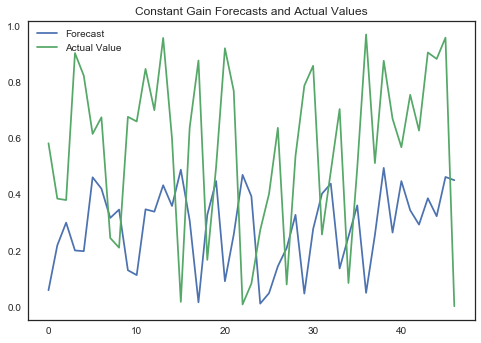

In [13]:
# plot predictions
plt.figure()
plt.plot(forecast[2950:], label='Forecast')
plt.plot(actual_values[2950:], label='Actual Value')
plt.legend(loc='upper left')
plt.title('Constant Gain Forecasts and Actual Values')
plt.show()